In [1]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')





In [2]:
house = pd.read_csv("Maison.csv")

house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [3]:
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})



In [4]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


<AxesSubplot:xlabel='price', ylabel='Density'>

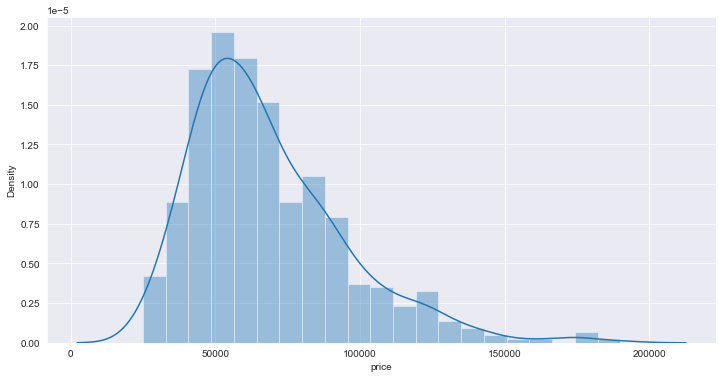

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house.price)

<AxesSubplot:xlabel='area', ylabel='Density'>

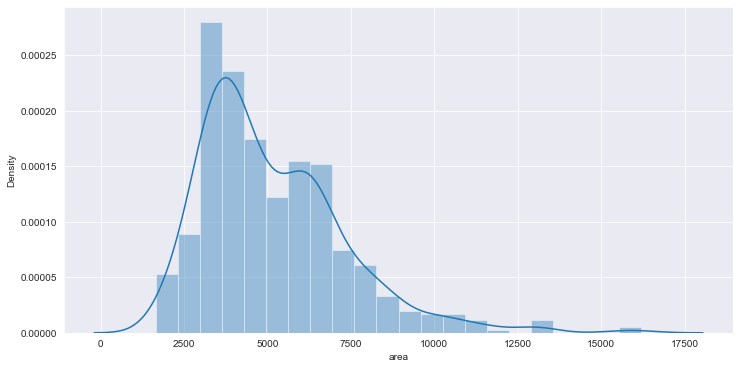

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house.area)

In [7]:
# Removing outliers in area

house = house[house['area']<11000]


In [8]:
# Remove outliers in price
house = house[house['price']<150000]
house.shape

(529, 12)

<AxesSubplot:xlabel='price', ylabel='Density'>

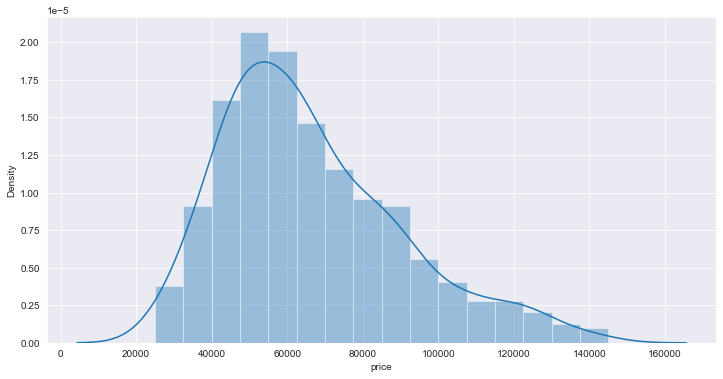

In [9]:
sns.distplot(house.price)

<AxesSubplot:xlabel='area', ylabel='Density'>

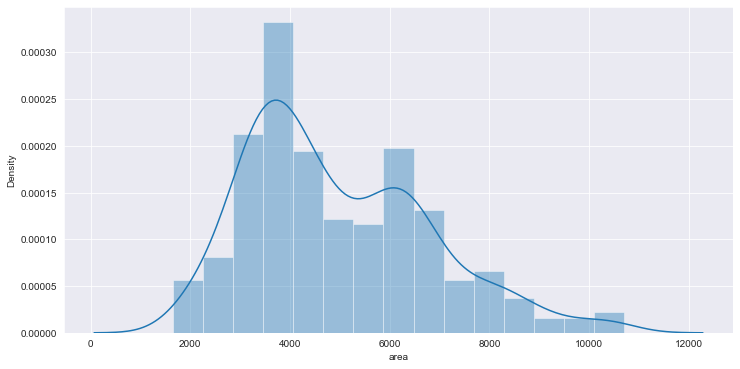

In [10]:
sns.distplot(house.area)

In [11]:
#  Log Transforming area column 
house.area = np.log(house.area)

<AxesSubplot:xlabel='area', ylabel='Density'>

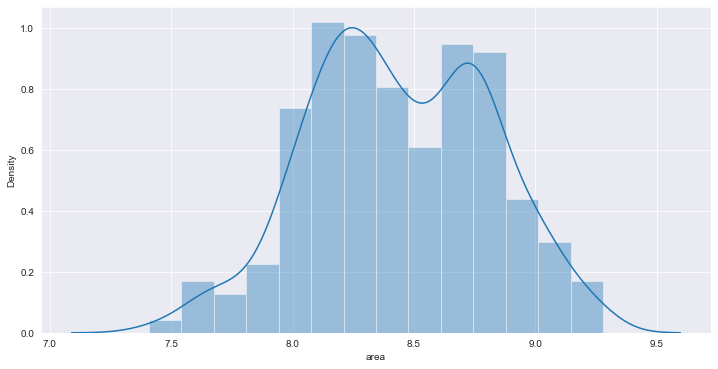

In [12]:
sns.distplot(house.area)

<AxesSubplot:>

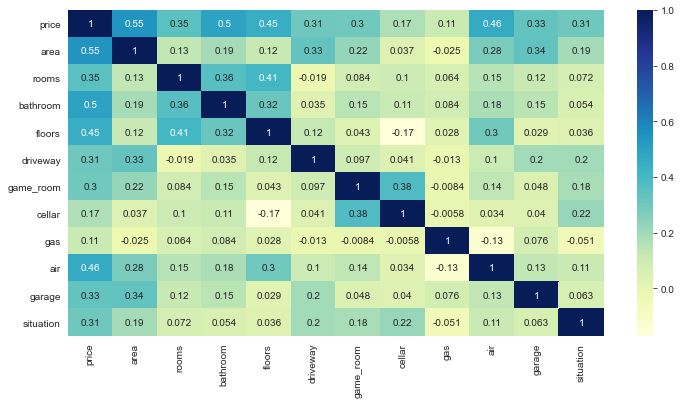

In [13]:
# Checking correlation, no significant correlation found to be removed

sns.heatmap(house.corr(), fmt='.2g', annot=True, cmap = 'YlGnBu')

In [14]:

from sklearn.model_selection import train_test_split

In [15]:
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 
       'cellar',  'air',  'situation','garage','gas','game_room']]


y = house['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [17]:
import statsmodels.api as sm

X_endog = sm.add_constant(X_test)

In [18]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [19]:
# R2 is 72.1%
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     34.58
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.22e-35
Time:                        20:36:30   Log-Likelihood:                -1726.9
No. Observations:                 159   AIC:                             3478.
Df Residuals:                     147   BIC:                             3515.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.344e+05   2.73e+04     -4.930      0.000   -1.88e+05   -8.05e+04
area        1.842e+04   3419.551      5.388      0.000    1.17e+04    2.52e+04
rooms        956.6476   1488.240      0.643      0.521   -1984.462    3897.757
bathroom     1.23e+04   2517.296      4.887      0.000    7327.300    1.73e+04
floors      7812.9551   1588.853      4.917      0.000    4673.012     1.1e+04
driveway    3271.1020   3024.306      1.082      0.281   -2705.632    9247.836
cellar      3262.1150   2500.201      1.305      0.194   -1678.866    8203.096
air         1.363e+04   2526.597      5.396      0.000    8639.992    1.86e+04
situation   1.086e+04   3083.282      3.521      0.001    4761.873    1.69e+04
garage      2146.8252   1419.356      1.513      0.133    -658.153    4951.803
gas         1.529e+04   4651.142      3.287      0.001    6095.753    2.45e+04
game_room   5091.5909   2836.703      1.795      0.075    -514.396    1.07e+04
==============================================================================
Omnibus:                        8.494   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.401
Skew:                           0.550   Prob(JB):                       0.0150
Kurtosis:                       3.242   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""